<a href="https://colab.research.google.com/github/gkkhnyldz/MachineLearningLessonsProject/blob/main/Ham%26SpamMailDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
##First, we scan our spam data. After reading our data with the read_csv command, we get information about the status of our data with the df.info command.
import pandas as pd

df = pd.read_csv('spamData.csv', encoding='latin-1')

df.info()

## columns 2,3 and 4 contain unnamed, missing information. We remove this data with the drop command.###df.drop(df.columns[4], axis=1, inplace=True)

df.drop(df.columns[3], axis=1, inplace=True)
df.drop(df.columns[2], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   rawText     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   rawText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
import numpy as np

np.unique(df.target)

x = list(df['rawText'])
y = list(df['target'])

#Here with the class called tokenizer, we correct the data that disrupts the homogeneity such as gaps in our data and make our data more workable.
class tokenizer:
    def __init__(self, text_data):
        self.vocab = {}
        self.__get_vocab(text_data)
        
    def convert_text_dataset_to_matrix(self, X):
        vocab = self.vocab
        result = []       
        for text in tqdm(X):
            vector = self.__text_to_vector(text)
            result.append(vector)
        return result
    
    def __get_vocab(self, text_data):
        word_id = 0
        for text in text_data:
            words = text.split()
            for word in words:
                word = word.lower()
                if word not in self.vocab:
                    self.vocab[word] = word_id
                    word_id += 1
        print(f'Dictionary size : {len(self.vocab)}')
    
    def __text_to_vector(self, text):
        vocab = self.vocab
        result = list(np.zeros(len(vocab)))
        words = text.split()
        for word in words:
            word = word.lower()
            if word in vocab:
                result[vocab[word]] += 1
        return result

from tqdm import tqdm
tz = tokenizer(x)
"""With the convert_text_dataset_to_matrix(x) command here, we are now processing your data and defining the processed data to x"""

X = tz.convert_text_dataset_to_matrix(x)

Dictionary size : 13496


100%|██████████| 5572/5572 [00:08<00:00, 620.15it/s]


In [6]:
from sklearn.model_selection import train_test_split
#We classify our data over knn by calling the Knn algorithm from the #Sklearn library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_knn= knn.predict(X_test)

print("Test accuracy score for KNN classification is: ",metrics.accuracy_score(y_test, y_pred_knn))

Test accuracy score for KNN classification is:  0.9533492822966507


In [7]:
##Here again, we call the svm classifier from the sklearn library and get the results."""

from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


print("Test accuracy score for SVM classification is: ",metrics.accuracy_score(y_test, y_pred_svm))

Test accuracy score for SVM classification is:  0.9826555023923444


In [8]:
##Here, we finally classify using the Naïve Bayes library on our data.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Test accuracy score for Naive Bayes classification is: ",metrics.accuracy_score(y_test, y_pred_nb))

Test accuracy score for Naive Bayes classification is:  0.9324162679425837


In [9]:
## Likewise, by calling the confusion_matrix algorithm from the sklearn.metrics library, 
##we create confusion matrixes of the predictions we made above with different classifications.
from sklearn.metrics import confusion_matrix, classification_report

conf_mtrx_knn = confusion_matrix(y_test, y_pred_knn)
conf_mtrx_svm = confusion_matrix(y_test, y_pred_svm)
conf_mtrx_nb = confusion_matrix(y_test, y_pred_nb)

classification_report_knn = classification_report(y_test, y_pred_knn)
classification_report_svm = classification_report(y_test, y_pred_svm)
classification_report_nb = classification_report(y_test, y_pred_nb)

from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]

    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()



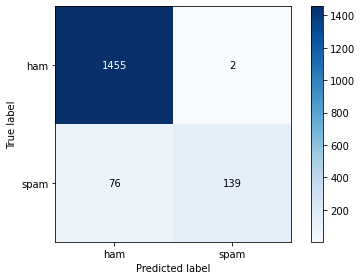

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1457
        spam       0.99      0.65      0.78       215

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [10]:
"""First of all, if we talk about the Knn classification, FP=2, that is, 2 raw mails were incorrectly determined as spam, in addition to this, FN= 76, that is, 76 spam mails were estimated as raw. If a high-level institution were to use this mail service, it would be raw. An important mail that was determined as spam instead of spam could have been overlooked and caused a big problem. Considering that the purpose of the system is to identify spam, if we consider the values by taking the spam positive, precision=0.99 is a desired situation here.
 Detecting a raw mail instead of spam is a big problem We can assume that the cost will be low for the company."""
plot_confusion_matrix(conf_mtrx_knn, np.unique(df.target), cmap=plt.cm.Blues)
print(classification_report_knn)

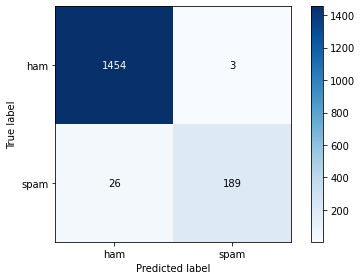

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1457
        spam       0.98      0.88      0.93       215

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



'Svm classifierinda ise 3 adet ham mail spam  olarak algılanmış FP=3 ve 26 adet spam mail ham mail olarak algılanmış yani FN = 26. Bu değerlere baktığımızda 3 adet mail spam kutusuna düşecektir, Aynı şekilde büyük bir şirket için 3 adet önemli mail büyük maliyetlere sebebiyet verebilir. Precision= 0.98 değeri ham mailin spam olarak algılanma maliyeti yüksek olduğu için istenen bir değerdir. Recall=0.88 bu değerin yüksek olması tabiki daha iyidir fakat maliyeti daha düşük varsayabiliriz.'

In [11]:
plot_confusion_matrix(conf_mtrx_svm, np.unique(df.target), cmap=plt.cm.Blues)
print(classification_report_svm)
"""In the svm classifier, 3 raw mails are detected as spam, FP=3 and 26 spam mails are detected as raw mail, that is, FN = 26. When we look at these values, 3 mails will fall into the spam box. Likewise, 3 important mails for a large company. It can cause huge costs. Precision= 0.98 is a desired value because the cost of detecting raw mail as spam is high. 
Recall=0.88 is of course better if this value is higher, but we can assume that the cost is lower."""



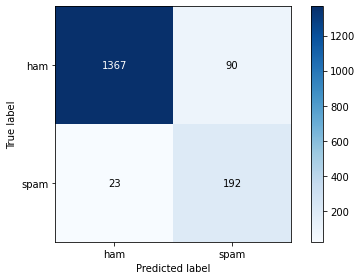

              precision    recall  f1-score   support

         ham       0.98      0.94      0.96      1457
        spam       0.68      0.89      0.77       215

    accuracy                           0.93      1672
   macro avg       0.83      0.92      0.87      1672
weighted avg       0.94      0.93      0.94      1672



'Burada Spam olarak adlandırılan fakat ham mail olan 90 adet mail vardır FN=90.Büyük bir şirket için 90 adet spam kutusuna düşen ham mail çok çok kötü bir sonuç olarak düşünebiliriz.23 adet ham olarak saptanan mail ise spam olarak geçmektedir. Bunun maliyeti düşündüğümüz duruma göre çok yüksek değildir. Precision= 0.68 bu spam olarak belirlenen maillerin %30 dan fazlasının ham olduğunu göstermektedir ve bunun sonucu şirketler için yüksek maliyetlere sebebiyet verebilir. recall=0.89 ham olarak tahmin edildiği halde spam olan mailleri gösterir ve kurduğumuz seneryoda bunun büyük bir maliyeti yoktur fakat eğer bu seneryo değişirde, spam maillerin mail kutumuza düşmemesi daha önemli olursa, farklı değerlendirilebilir.\n\n'

In [12]:
plot_confusion_matrix(conf_mtrx_nb, np.unique(df.target), cmap=plt.cm.Blues)
print(classification_report_nb)
"""Here, there are 90 mails that are called Spam but are raw mails. 
FN=90. For a large company, we can think that raw mail that falls into 90 spam boxes is a very, very bad result. 
23 mails that are detected as raw are considered as spam. The cost is not very high compared to the situation we think.
 Precision= 0.68 this shows that more than 30% of the mails determined as spam are raw and as a result, it may cause high costs for companies. 
 recall=0.89 shows the mails that are spam even though it is estimated as raw and in the scenario we established, it is large. there is no cost, but if this scenario changes, it is more important that spam mails do not fall into our mailbox, it can be evaluated differently.

"""


Here, there are 90 mails that are called Spam but are raw mails. FN=90. For a large company, 90 raw mails in spam boxes can be considered as a very, very bad result. 23 mails that are detected as raw are considered as spam. The cost of this is not very high compared to the situation we think. Precision= 0.68 shows that more than 30% of these emails identified as spam are raw, which can result in high costs for companies. recall=0.89 shows spam mails even though it is estimated as raw, and it does not cost a lot in the scenario we set up, but if this scenario changes, if it is more important that spam mails do not fall into our mailbox, it can be evaluated differently.\n\n

'Öncelikle 3 sınıflandırıcı karşılaştırırken, f1 scorlarından başlarsak \nbayes :0.77 \nSvm: 0.93  \nKnn :  0.78  scorlarına sahiptir. F1 scoru bizim için önemli bir metriktir ve buraya bakılırsa Svm sınıflandırıcısını kullanmak daha iyi bir tercihtir. Buna ek olarak Svm ve Knn sınıflandırıcılarını karşılaştırıcak olursak, aslında 2 side maliyeti yüksek olan ham maili spam olarak algılamada yakın değerler bulmaktadır, fakat Svm sınıflandırıcısı, ham olarak belirlediği maillerde daha az hata yapmıştır ve bu yüzden tercih edilmiştir. Baştada bahsettiğim üzere, bu analiz ham mailin spam maili olarak görülmesi maliyetinin yüksek olduğu bir seneryodur.\n\nBunlara ek olarak ROC eğrilerini karşılaştıracak olursak, ROC eğrisi altında kalan alan en çok hangisinde ise o sınıflandırıcının daha iyi olduğunu biliyoruz, yukarıdada seçtiğimiz üzere Svm sınıflandırıcısı diğerlerinden daha çok alana sahiptir\n'

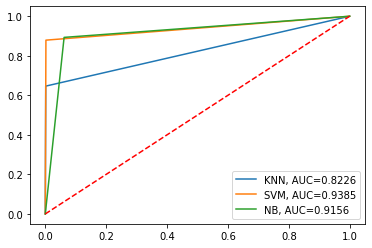

In [13]:
## Algoritmalarimizin Roc egrilerini cizerek hangi algoritmanin daha iyi calistigini analizleyelim
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

plt.figure(0).clf()

#converting ham spam strings to 0 and 1
y_test_cv = [int(u in 'spam') for u in y_test]
y_pred_knn_cv = [int(u in 'spam') for u in y_pred_knn]
y_pred_svm_cv = [int(u in 'spam') for u in y_pred_svm]
y_pred_nb_cv = [int(u in 'spam') for u in y_pred_nb]

fpr, tpr,_ = metrics.roc_curve(y_test_cv, y_pred_knn_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_knn_cv), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_svm_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_svm_cv), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_nb_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_nb_cv), 4)
plt.plot(fpr,tpr,label="NB, AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')

plt.legend()
"""When comparing 3 classifiers first, if we start with f1 scores
bayes :0.77
Svm: 0.93
Knn: It has 0.78 scores. The F1 score is an important metric for us and judging from here it is a better choice to use the Svm classifier. In addition, if we compare the Svm and Knn classifiers, it actually finds close values in perceiving the raw mail, which has a high cost of 2 sides, as spam, but the Svm classifier made less mistakes in the mails it determined as raw, so it was preferred. As I mentioned at the beginning, this analysis is a scenario where the cost of seeing raw mail as spam mail is high.

In addition to these, if we compare the ROC curves, we know which classifier has the most area under the ROC curve, as we have chosen above, the Svm classifier has more areas than the others.
"""